In [2]:
!pip install nibabel

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 139.8 MB/s eta 0:00:00

[notice] A new release of pip available: 22.3 -> 23.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [3]:
import tarfile
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import tensorflow 
import seaborn as sns
import keras
import keras.backend as K
keras = tensorflow.compat.v1.keras
Sequence = keras.utils.Sequence
from sklearn.model_selection import train_test_split
import cv2

from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, TensorBoard, CSVLogger
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

/home/ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [4]:
print("Num GPUs Available: ", len(tensorflow.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [7]:
 # When executing, set this path to the root path of your data folder. 
train_data_path = "../data"

In [8]:
if(nib.load(train_data_path+"/BraTS2021_00000/BraTS2021_00000_flair.nii.gz")):
    image_size=nib.load(train_data_path+"/BraTS2021_00000/BraTS2021_00000_flair.nii.gz").get_fdata().shape[0]
    print("Data path working...")
else:
    print("Data path failed. Make sure your data_path is correct")

Data path working...


In [9]:
print("Image dimensions: %i x %i" %(nib.load(train_data_path+"/BraTS2021_00000/BraTS2021_00000_flair.nii.gz").get_fdata().shape[0], nib.load(train_data_path+"/BraTS2021_00000/BraTS2021_00000_flair.nii.gz").get_fdata().shape[1]))

Image dimensions: 240 x 240


In [25]:
path = "../data/" + "BraTS2021_00000" + "/BraTS2021_00000_flair.nii.gz"

image = nib.load(path).get_fdata()

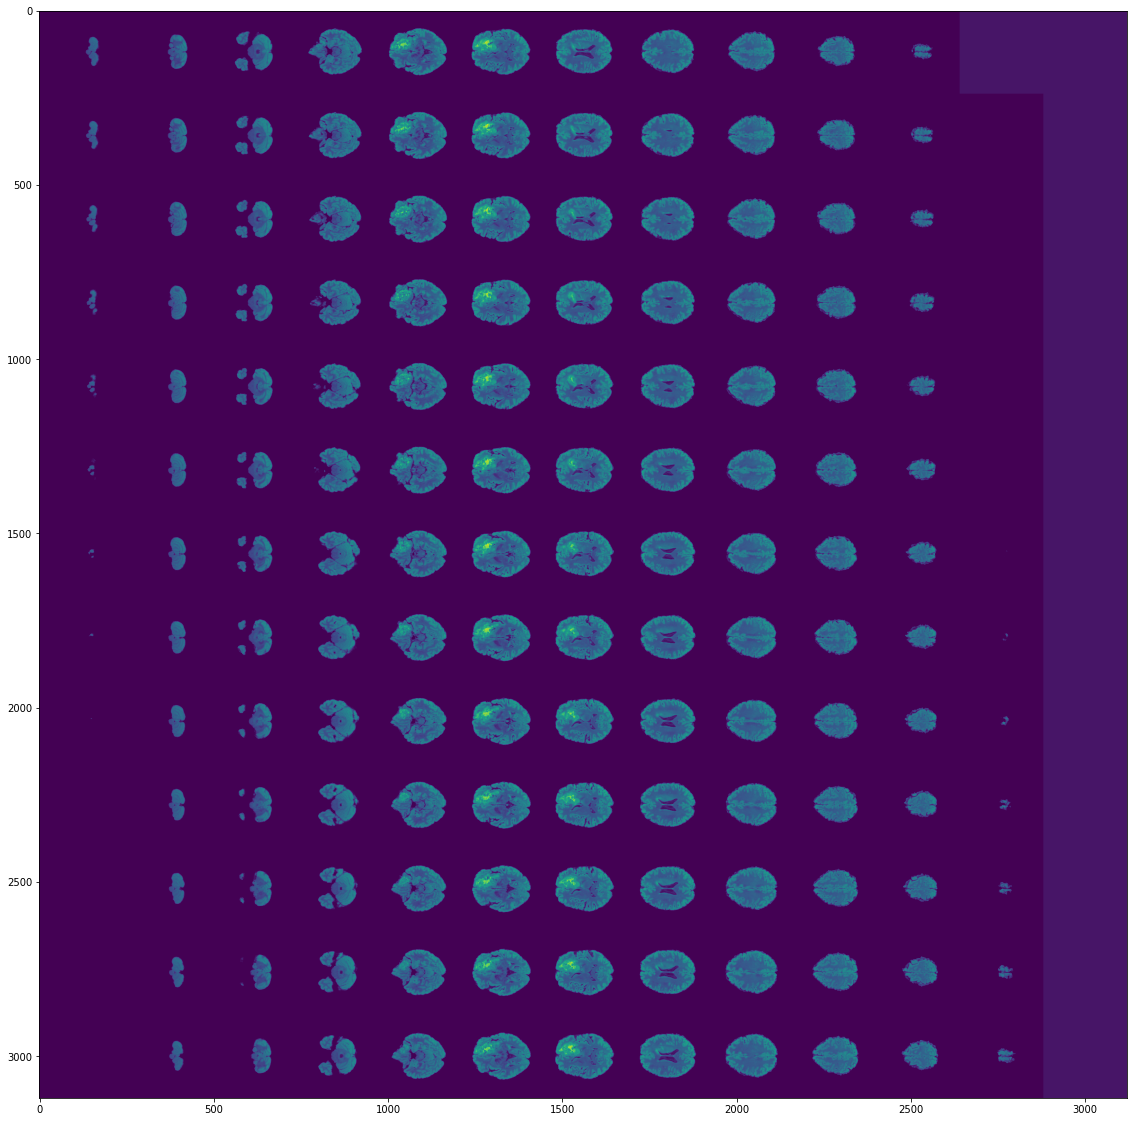

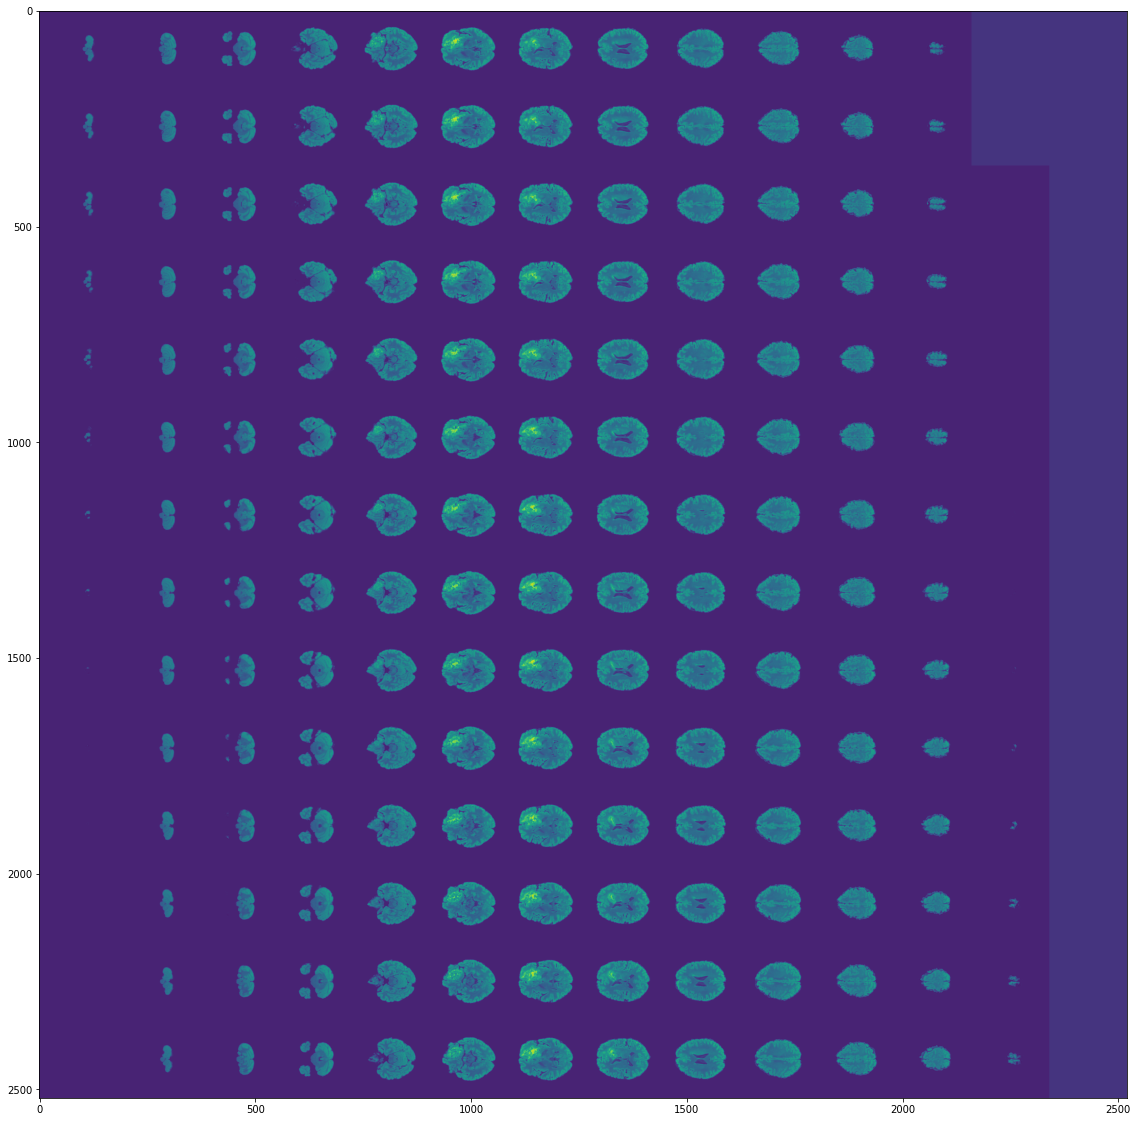

In [26]:
from skimage.util import montage 
from skimage.transform import rotate
from scipy.ndimage import zoom

def imshow3D(img, save=False, path=None):
    if save and path==None:
        print("Error. Cannot save without a valid path.")
        return
    fig,ax = plt.subplots(1, 1, figsize = (20,20))
    ax.imshow(rotate(montage(np.swapaxes(img,0,2)), 90, resize=True))

imshow3D(image)

imshow3D(zoom(image,(180/image.shape[0], 180/image.shape[1], 180/image.shape[2])))


In [44]:
newimg = zoom(image,(180/image.shape[0], 180/image.shape[1], 180/image.shape[2]))

In [46]:
newimg.shape

(180, 180, 180)

In [58]:
def imgshow3D(img, save=False, path=None):
    if save and path==None:
        print("Error. Cannot save without a valid path.")
        return
    fig,ax = plt.subplots(1, 1, figsize = (20,20))
    ax.imshow(rotate(montage(np.swapaxes(img,0,2)), 90, resize=True))

In [59]:
def resize_MRI_image(id):
    ext = ["flair", "t1ce", "t2", "t1", "seg"]
    resimages = []
    for extention in ext:
        pathhhh = "../data/" + id + "/" + id + "_" + extention +".nii.gz"
        mri = nib.load(pathhhh)
        ima = mri.get_fdata()
        ima = zoom(ima,(180/ima.shape[0], 180/ima.shape[1], 180/ima.shape[2]))

        clipped_img = nib.Nifti1Image(ima, mri.affine)
        nib.save(clipped_img, "../" + id + "_" + extention +".nii.gz")

    return resimages

In [60]:
images = resize_MRI_image("BraTS2021_00000")


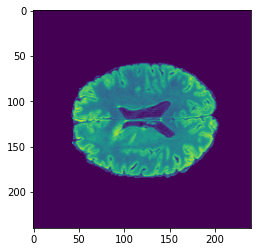

In [31]:
plt.imshow(images[0][:,:,90])

In [66]:
plt.imshow(images[3][:,:,75])

IndexError: list index out of range

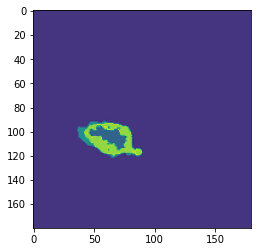

In [65]:
cropped = nib.load("../BraTS2021_00000_seg.nii.gz").get_fdata()

plt.imshow(cropped[:,:,75])